In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats

In [83]:
from code.series import series_x_mu_b_zero
from code.series import series_x_mu_b_zero_pos

In [208]:
alpha = 15
beta = 0
mu = 1.3
delta = 10

In [209]:
x = 0.5

In [210]:
x - mu

-0.8

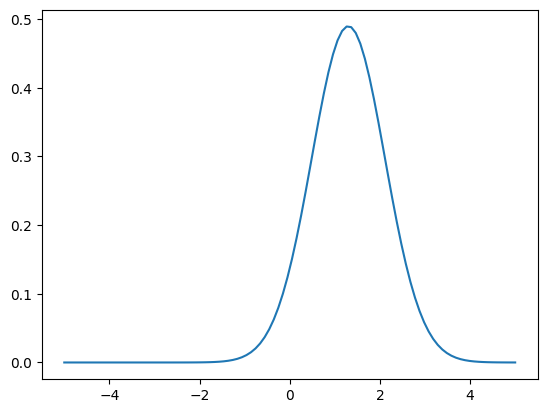

In [211]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, stats.norminvgauss.pdf(xx, a=alpha*delta, b=beta*delta, loc=mu, scale=delta))
plt.show()

In [212]:
stats.norminvgauss.cdf(x, a=alpha*delta, b=beta*delta, loc=mu, scale=delta)

0.1631845832769958

In [213]:
series_x_mu_b_zero(x, alpha, mu, delta, maxiter=200)

(0.16318458327699636, 13)

In [214]:
1.0 - series_x_mu_b_zero_pos(-x, alpha, -mu, delta, maxiter=100)[0]

0.16318458327699004

In [204]:
H = 1

series_x_mu_b_zero(x*H, alpha/H, mu*H, delta*H)

(0.16318458327699636, 13)

In [205]:
from mpmath import *

In [206]:
mp.dps = 50

def normcdf(x):
    return erfc(-x / sqrt(2)) / 2

def fun_phi(t):
    C = delta / sqrt(2 * pi)
    return C * normcdf((x - mu) / sqrt(t)) * t ** (-3/2) * exp(-(delta - alpha * t) ** 2 / 2 / t)

alpha = mpmathify(alpha)
mu = mpmathify(mu)
delta = mpmathify(delta)
x = mpmathify(x)

quad(fun_phi, [0, inf])

mpf('0.16318458327699647853355366546659974297701474624964833')

In [ ]:
C = delta * exp(delta * alpha)

s = 0
for k in range(40):
    r = (-1)**k * (x - mu) ** (2*k + 1) * (alpha / delta) ** (k+1) * besselk(k+1, alpha * delta)
    q = 2 ** k * factorial(k) * (2*k + 1)
    s += r / q

1/2 + C * s * sqrt(2 / pi)

In [ ]:
C = delta / sqrt(2 * pi) * exp(delta * alpha)

s = 0
for k in range(7):
    r = (-1) ** k * (x - mu) ** (2 * k + 1) / 2 ** k / factorial(k) / (2*k + 1)
    q = besselk(k + 1, alpha * delta) * (alpha / delta) ** (k+1)
    t = r * q
    s += t
    # print(f'bessel{k}', besselk(k + 1, alpha * delta))
    print(k, besselk(k + 1, alpha * delta), t)

1 / 2 + 2 * C / sqrt(2 * pi) * s

0 -0.0000083894514114805423250902516608999459570255313053795
1 -0.0000097650062069961436181515160152318190529539775680679
2 -0.0000073976527993632920381978255709151894359476956054093
3 -0.0000043371666108359996309805048290096913874969272406625
4 -0.0000021394824831256071899906891516319330118557814812931
5 -0.00000093233000393422624441941229133739182458842806637102
6 -0.00000037038263455503031640593582514653189169994931398684
7 -0.0000001370681261954493155600684464241504887268192419449
8 -0.000000047989749270818952967050688583624267565173196385499
9 -0.000000016078477725292386335689490759505583778949923925307


mpf('0.029789545841584005123713333409591324992959310521357607')

In [111]:
for k in range(10):
    print(2*k+1, fac2(2*k + 1))

1 1.0
3 3.0
5 15.0
7 105.0
9 945.0
11 10395.0
13 135135.0
15 2027025.0
17 34459425.0
19 654729075.0


In [179]:
fn = 3
fn1 = 3
for k in range(2, 10):
    fn *= (2*k + 1)
    fn2 = (2*k + 1) * fn1
    print(k, 2*k+1, fn2, fn)
    fn1 = fn2

2 5 15 15
3 7 105 105
4 9 945 945
5 11 10395 10395
6 13 135135 135135
7 15 2027025 2027025
8 17 34459425 34459425
9 19 654729075 654729075
